___
# PROJETO 1

## <font color='red'>BRUNO LEITE LANDWEHR</font>
___

## <font color='blue'>APOSENTADOS X NÃO APOSENTADOS</font>

## Introdução

No estudo a seguir, será observada as principais diferenças entre aposentados e não aposentados. Com base no artigo  do site http://mazzoecarvalho.jusbrasil.com.br/artigos/125712593/aposentadoria-por-idade-no-brasil, pôde-se observar que a idade que se pode aposentar é muito baixa em relação à expectativa de vida de hoje em dia. Deste modo, o principal objetivo da análise a seguir é confirmar que, para a sociedade como um todo, a "aposentadoria antecipada" é injusta.


___
## Análise e Resultados

In [614]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [615]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/brunolandwehr/Desktop/INSPER/2º SEMESTRE/Ciência dos Dados


In [616]:
#Leitura da base já em formato de DataFrame e extensão .csv
dados = pd.read_csv('PES2014.txt', sep=',')

___

In [812]:
n=dados.shape[0]
aposentados=dados.V9122.astype('category')
aposentados.cat.categories=('Aposentados', 'Não aposentados')
chefe_familia=dados.V0402.astype('category')
idade=dados.V8005
#curso_mais_elevado=dados.V6007.astype('category')
renda_do_trabalho=dados.V4718
renda_total=dados.V4720
sexo=dados.V0302.astype('category')
sexo.cat.categories=('Masculino', 'Feminino')
#rede_ensino=dados.V6020.astype('category')
#rede_ensino.cat.categories=('Rede pública', 'Rede privada','Nenhum')
trabalha=dados.V9001.astype('category')
trabalha.cat.categories=('Sim', 'Não')

In [806]:
print('Porcentagem da amostra que é aposentada ou não:')
x = (aposentados.value_counts(True)*100).round(decimals=2)
print(x)

Porcentagem da amostra que é aposentada ou não:
Não aposentados    75.32
Aposentados        10.66
dtype: float64


In [745]:
print('Porcentagem da amostra que é aposentada ou não(considerando chefes de família):')
x1 = (aposentados[(chefe_familia==1)].value_counts(True)*100).round(decimals=2)
print(x1)

Porcentagem da amostra que é aposentada ou não(considerando chefes de família):
Não aposentados    79.8
Aposentados        20.2
dtype: float64


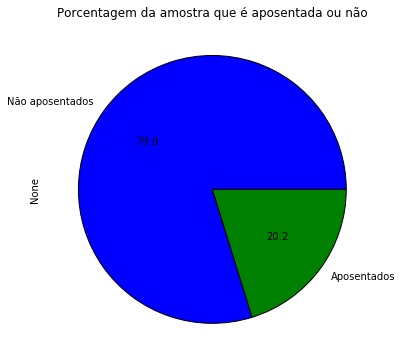

In [809]:
plot = x1.plot(kind='pie',title='Porcentagem da amostra que é aposentada ou não',autopct='%.1f',figsize=(6, 6))

In [799]:
print('Porcentagem da amostra que é aposentada ou não (considerando chefes de família com mais de 54 anos):')
x2 = (aposentados[(chefe_familia==1)&(idade>=54)].value_counts(True)*100).round(decimals=2)
print(x2)

Porcentagem da amostra que é aposentada ou não (considerando chefes de família com mais de 54 anos):
Aposentados        53.28
Não aposentados    46.72
dtype: float64


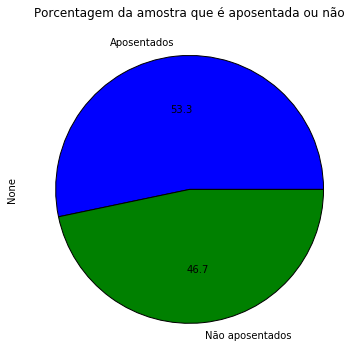

In [810]:
plot = x2.plot(kind='pie',title='Porcentagem da amostra que é aposentada ou não',autopct='%.1f',figsize=(6, 6))

In [800]:
print('Porcentagem da amostra que é aposentada ou não (considerando chefes de família com mais de 54 anos e menos de 77):')
x3 = (aposentados[(chefe_familia==1)&(idade>=54)&(idade<=77)].value_counts(True)*100).round(decimals=1)
print(x3)

Porcentagem da amostra que é aposentada ou não (considerando chefes de família com mais de 54 anos e menos de 77):
Aposentados        50.0
Não aposentados    50.0
dtype: float64


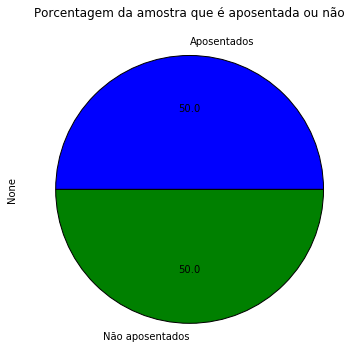

In [811]:
plot = x3.plot(kind='pie',title='Porcentagem da amostra que é aposentada ou não',autopct='%.1f',figsize=(6, 6))

Nos gráficos de pizza acima foram feitas algumas 'exigências' para que a comparação entre aposentados e não aposentados seja justa. Ou seja, limitandos as amostras para pessoas entre 54 e 77 anos e chefes de família, é possível analisar as principais diferenças entre os grupos, sendo que, o principal fator é o fato de um deles ser um grupo de aposentados ou não. Além disso, é possível observar que, no último gráfico, praticamente não há diferença entre a amostra de aposentados ou não aposentados. Isso facilitará as próximas análises, uma vez que os números absolutos poderão ser comparados.

In [855]:
#print('Aposentados graduados ou não:')
#x4 = (aposentados[((curso_mais_elevado==8)|(curso_mais_elevado==9))&(chefe_familia==1)&(idade>=54)&(idade<=77)].value_counts(True)*100).round(decimals=2)
#print(x4)
#print('Não aposentados graduados ou não:')
#x5 = (aposentados[(curso_mais_elevado!=8)&(curso_mais_elevado!=9)&(chefe_familia==1)&(idade>=54)&(idade<=77)].value_counts(True)*100).round(decimals=2)
#print(x)

In [854]:
#plot = x4.plot(kind='bar',title='Graduados',figsize=(6, 6),color=('g''r'))
#plt.ylabel('Freq.Relativa (em%)')

In [853]:
#plot = x5.plot(kind='bar',title='Não graduados',figsize=(6, 6),color=('r','g'))
#plt.ylabel('Freq.Relativa (em%)')

In [861]:
renda_do_trabalho[(renda_do_trabalho!=999999999999)&(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].describe()

count      5865.000000
mean       1671.243478
std        5195.102145
min           0.000000
25%           0.000000
50%         724.000000
75%        1600.000000
max      300000.000000
Name: V4718, dtype: float64

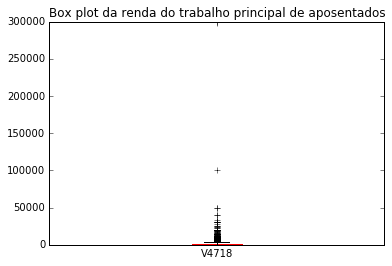

In [900]:
renda_do_trabalho[(renda_do_trabalho!=999999999999)&(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].plot (kind='box')
plt.title("Box plot da renda do trabalho principal de aposentados")

In [863]:
renda_do_trabalho[(renda_do_trabalho!=999999999999)&(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].describe()

count     12299.000000
mean       2060.672982
std        3563.657428
min           0.000000
25%         724.000000
50%        1080.000000
75%        2000.000000
max      150000.000000
Name: V4718, dtype: float64

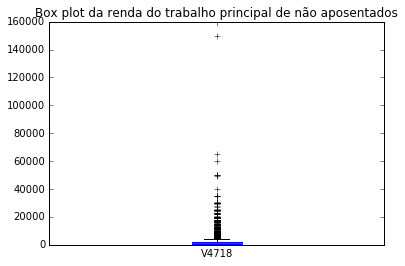

In [899]:
renda_do_trabalho[(renda_do_trabalho!=999999999999)&(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].plot (kind='box')
plt.title("Box plot da renda do trabalho principal de não aposentados")

In [881]:
faixa1 = np.arange(500, 4001,500)
variávelCat1 = pd.cut(renda_do_trabalho[(renda_do_trabalho!=999999999999)&(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)], faixa1) 
variávelCat1.value_counts()

(500, 1000]     1080
(1000, 1500]     604
(1500, 2000]     395
(2500, 3000]     196
(2000, 2500]     173
(3500, 4000]      89
(3000, 3500]      68
dtype: int64

In [882]:
faixa2 = np.arange(500, 4001,500)
variávelCat2 = pd.cut(renda_do_trabalho[(renda_do_trabalho!=999999999999)&(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)], faixa2) 
variávelCat2.value_counts()

(500, 1000]     3684
(1000, 1500]    2222
(1500, 2000]    1153
(2000, 2500]     540
(2500, 3000]     515
(3500, 4000]     299
(3000, 3500]     224
dtype: int64

Foram excluídos, na faixa acima, os valores que se distanciam da maioria dos valores da amostra. Tal corte foi feito a partir do calculo de Q3+1,5(Q3-Q1), que calcula o limite superior no box plot.(Ambos limites eram parecidos, foi pego o maior)

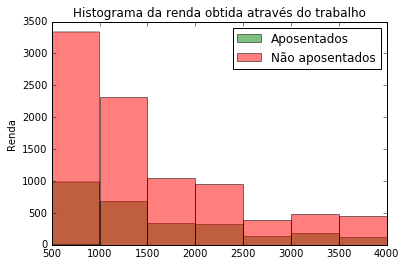

In [902]:
plot = renda_do_trabalho[(renda_do_trabalho!=999999999999)&(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].plot.hist(bins=faixa1,alpha=0.5,color='g')
plot = renda_do_trabalho[(renda_do_trabalho!=999999999999)&(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].plot.hist(bins=faixa2,alpha=0.5,color='r')
plt.legend(["Aposentados", "Não aposentados"])
plt.ylabel('Renda')
plt.title("Histograma da renda obtida através do trabalho")

O histograma acima mostra a renda de trabalhadores com base apenas em seu trabalho principal. Analisando tal gráfico, observa-se que a renda de trabalhadores não aposentados é muito maior que a renda do outro grupo. Exemplificando, assim, a tendência de 'abaixar o ritmo' de trabalho a partir do momento em que a aposentadoria é concedida


In [869]:
renda_total[(renda_do_trabalho!=999999999999)&(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].describe()

count    1.919000e+04
mean     1.474727e+10
std      1.205427e+11
min      6.220000e+02
25%      7.240000e+02
50%      1.276000e+03
75%      2.200000e+03
max      1.000000e+12
Name: V4720, dtype: float64

In [885]:
faixa3 = np.arange(500, 4501,500)
variávelCat3 = pd.cut(renda_total[(renda_do_trabalho!=999999999999)&(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)], faixa3) 
variávelCat3.value_counts()

(500, 1000]     8362
(1000, 1500]    3799
(1500, 2000]    1737
(2000, 2500]    1105
(2500, 3000]     900
(3000, 3500]     486
(3500, 4000]     453
(4000, 4500]     227
dtype: int64

In [871]:
renda_total[(renda_do_trabalho!=999999999999)&(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].describe()

count    1.909300e+04
mean     5.132773e+09
std      7.146113e+10
min      0.000000e+00
25%      6.190000e+02
50%      8.530000e+02
75%      1.750000e+03
max      1.000000e+12
Name: V4720, dtype: float64

In [886]:
faixa4 = np.arange(500, 4501,500)
variávelCat4 = pd.cut(renda_total[(renda_do_trabalho!=999999999999)&(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)], faixa4) 
variávelCat4.value_counts()

(500, 1000]     6468
(1000, 1500]    2930
(1500, 2000]    1487
(2000, 2500]     753
(2500, 3000]     698
(3500, 4000]     346
(3000, 3500]     306
(4000, 4500]     131
dtype: int64

Para o cálculo do valor máximo na faixa acima foi utilizado o mesmo método da renda do trabalho anteriormente.

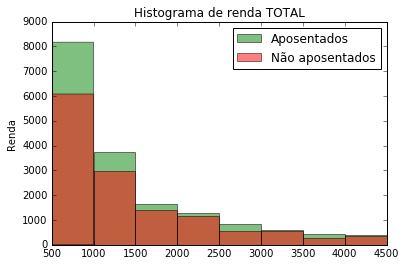

In [901]:
plot = renda_total[(renda_do_trabalho!=999999999999)&(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].plot.hist(bins=faixa3,alpha=0.5,color='g')
plot = renda_total[(renda_do_trabalho!=999999999999)&(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].plot.hist(bins=faixa4,alpha=0.5,color='r')
plt.legend(["Aposentados", "Não aposentados"])
plt.ylabel('Renda')
plt.title("Histograma de renda TOTAL")

Desta vez o histograma também relaciona aposentados e não aposentados, entretando, comparando sua renda total, e não apenas a renda de seu trabalho principal. Vizualizando brevemente o gráfico pode-se perceber que a renda total dos aposentados supera a renda dos não aposentados. Essa análise vai de encontro com o esperado, uma vez que vimos no primeiro histograma que os aposentados tem uma renda - por trabalho principal - menos do que a do outro grupo. Concluí-se desta análise que o que faz essa diferença é a renda de aposentadoria recebida pelo governo.

In [837]:
print('Sexo dos aposentados:')
x10 = (sexo[(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].value_counts(True)*100).round(decimals=2)
print(x10)

Sexo dos aposentados:
Masculino    60.8
Feminino     39.2
dtype: float64


In [767]:
print('Sexo dos não aposentados:')
x11 = (sexo[(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].value_counts(True)*100).round(decimals=2)
print(x11)

Sexo dos não aposentados:
Masculino    52.91
Feminino     47.09
dtype: float64


In [768]:
#print('Rede de ensino dos aposentados:')
#x12 = (rede_ensino[(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].value_counts(True)*100).round(decimals=2)
#print(x12)

In [769]:
#print('Rede de ensino dos não aposentados:')
#x13 = (rede_ensino[(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].value_counts(True)*100).round(decimals=2)
#print(x13)

In [770]:
print('Aposentados trabalhadores ou não:')
x14 = (trabalha[(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].value_counts(True)*100).round(decimals=2)
print(x14)

Aposentados trabalhadores ou não:
Não    73.71
Sim    26.29
dtype: float64


In [771]:
print('Não aposentados trabalhadores ou não:')
x15 = (trabalha[(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].value_counts(True)*100).round(decimals=2)
print(x15)

Não aposentados trabalhadores ou não:
Sim    61.65
Não    38.35
dtype: float64


Nas tabelas acima foi observado, conforme o esperado, que há uma taxa maior de aposentados que não trabalham do que de aposentados trabalhadores. Isso ja ajuda a entender que a aposentadoria afeta o número de trabalhadores, porém serão feitas mais análises.

In [772]:
y1=pd.crosstab(sexo[(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)],trabalha[(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)],margins=True,rownames=['SEXO'], colnames=['Trabalha'])
y11=(y1/len(dados)*100).round(decimals=2)
y1

Trabalha,Sim,Não,All
SEXO,,,
Masculino,3786,8021,11807
Feminino,1319,6292,7611
All,5105,14313,19418


In [896]:
y2=pd.crosstab(sexo[(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)],trabalha[(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)],margins=True,rownames=['SEXO'], colnames=['Trabalha'])
y21=(y2/len(dados)*100).round(decimals=2)
y2

Trabalha,Sim,Não,All
SEXO,,,
Masculino,8344,1927,10271
Feminino,3624,5519,9143
All,11968,7446,19414


As tabelas cruzadas de sexo e trabalho acima nos dão uma característica interessante de nosso sistema. Elas informam que a maioria das pessoas aposentadas são do sexo masculino sendo que, a maioria delas, não trabalha. Já a tabela que se refere aos não aposentados mostra que a quantidade de homens é quase igual a de mulheres, entretanto os primeiro trabkham em uma taxa bem maior que as mulheres.

In [774]:
print('Idade dos aposentados:')
x16 = (idade[(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)].value_counts()/n*100).round(decimals=2)
print(x16)

Idade dos aposentados:
66    0.32
64    0.31
65    0.30
67    0.29
68    0.28
62    0.28
70    0.28
69    0.27
63    0.27
72    0.25
71    0.25
60    0.25
61    0.25
74    0.24
73    0.21
75    0.20
76    0.18
58    0.16
59    0.16
77    0.15
57    0.14
56    0.12
55    0.11
54    0.09
Name: V8005, dtype: float64


In [775]:
print('Idade dos aposentados:')
x16 = (idade[(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=64)].value_counts()/n*100).round(decimals=2)
print(x16)

Idade dos aposentados:
64    0.31
62    0.28
63    0.27
60    0.25
61    0.25
58    0.16
59    0.16
57    0.14
56    0.12
55    0.11
54    0.09
Name: V8005, dtype: float64


In [781]:
faixay = np.arange(54, 79, 3)
variávelCaty = pd.cut(idade[(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=64)], faixay) 

In [777]:
y4=pd.crosstab(idade[(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=64)],trabalha[(aposentados=='Não aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)],margins=True,rownames=['IDADE'], colnames=['Trabalha'])
y41=(y4/len(dados)*100).round(decimals=2)
y4

Trabalha,Sim,Não,All
IDADE,,,
54.0,1643,476,2119
55.0,1391,460,1851
56.0,1432,485,1917
57.0,1234,422,1656
58.0,1148,437,1585
59.0,1048,408,1456
60.0,879,455,1334
61.0,622,351,973
62.0,593,369,962


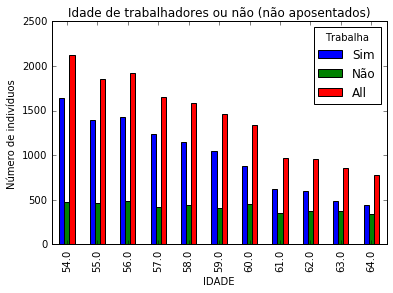

In [903]:
y4 = y4.iloc[0:11,]
plot = y4.plot(kind='bar')
plt.ylabel('Número de indivíduos')
plt.title("Idade de trabalhadores ou não (não aposentados)")

No gráfico acima foram escolhidas idades apenas entre 54 e 64 anos, uma vez que o objetivo principal era analisar uma tendência. No gráfico de não aposentados , pode-se observar que, naturalmente, as pessoas passam a trabalhar menos conforme ficam mais velhas.

In [779]:
y5=pd.crosstab(idade[(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=64)],trabalha[(aposentados=='Aposentados')&(chefe_familia==1)&(idade>=54)&(idade<=77)],margins=True,rownames=['IDADE'], colnames=['Trabalha'])
y51=(y4/len(dados)*100).round(decimals=2)
y5

Trabalha,Sim,Não,All
IDADE,,,
54.0,104,210,314
55.0,138,261,399
56.0,134,284,418
57.0,165,348,513
58.0,206,388,594
59.0,187,394,581
60.0,328,570,898
61.0,332,564,896
62.0,338,670,1008


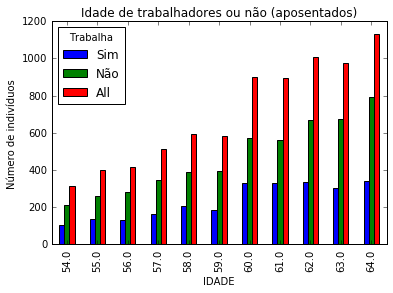

In [904]:
y5 = y5.iloc[0:11,]
plot = y5.plot(kind='bar')
plt.title("Idade de trabalhadores ou não (aposentados)")
plt.ylabel('Número de indivíduos')

Do mesmo modo que foi feito no gráfico de não aposentados, o gráfico de aposentados relaciona trabalho e idades entre 54 e 64 anos. No gráfico acima vemos a tendência, também natural, do numero de não trabalhadores aumentar conforme os anos se passam. Entretanto, outro fato que é importante de ser o bservado é a relação entre trabalhadores e não trabalhadores em tais idades. Em todas as idades acima o número de trabalhadores é praticamente metade do número de não trabalhadores, o que impressiona, uma vez que, hoje em dia, a faixa de 55 anos, por exemplo, não é tão alta a ponto do indivíduo - mesmo que aposentado- não trabalhar.

___
## Conclusão 

    Após a análise dos gráficos e tabelas acima, as conclusões foram parecidas com o que foi esperado. Com os gráficos de barras feitos a partir das tabelas cruzadas foi possível concluir que os aposentados têm uma tendência a parar de trabalhar, o que não é de todo ruim quando se trata de idades elevadas o e não de idades em torno de 55 anos como é o caso.
    Hoje em dia, como a expectativa de vida do brasileiro passa dos 75 anos, com 55 anos, por exemplo, a pessoa tem total condições de trabalhar e se útil na sociedade. Mas como foi observado na análise, há muitos brasileiros que nesta faixa de idade se aposentam e, além disso, deixam de trabalhar. Em outras palavras, passam a receber dinheiro do resto da população indiretamente.
    Outra análise que gerou uma conclusão foi a análise dos histogramas compostos. Foi observado que mesmo com os não aposentados tendo uma renda de trabalho bem maior do que a dos aposentados, a renda total dos primeiros é menor do que a dos segundos. Isso, certamente, se deve ao fato que que a renda total dos aposentados também é composta pela aposentadoria. Em suma, concluí-se que é, de certa forma, injusto uma pessoa aposentada com condições de trabalho receber mais do que uma pessoa não aposentada, sendo que essa última recebe muito mais pelo seu trabalho principal. Indo mais além poderia se estabelecer uma conclusão de que as regras da previdência devem ser revisadas.